# Regresión

### Por qué utilizar regresión

Los datos que deseamos predecir no siempre se encuentran limitados a un conjunto de clases predeterminado. Para esos casos, no se puede utilizar un problema de clasificación puesto que la cantidad de clases tendría que ser infinita.

Por ejemplo, si quisiéramos establecer las posibilidades de respuesta para el país de procedencia de una persona, podemos crear un conjunto de todos los países que existen en el mundo. Si bien el listado puede ser un poco largo, tenemos una cantidad finita de opciones de las cuales elegir una. Sin embargo, si quisiéramos hacer lo mismo con su peso, sería imposible definir cada una de las opciones de respuesta. ¿Las opciones serían 50kg, 51kg, 53kg; hasta qué límite? Y sería aún más complejo si empezáramos a incluir decimales. ¿50.1kg, 50.2kg, 50.3kg?

Este tipo de opciones de respuesta se conoce como **continuo**, pues no pertenecen a un conjunto prestablecido de opciones. Cuando tratamos de predecir un dato de esta naturaleza, nos enfrentamos a un problema de regresión.

In [1]:

from time import time
import pandas as pd
import numpy as np

from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

##Regresion


Empecemos utilizando el set de datos sobre la compañía de telefonía.

In [2]:
df = pd.read_csv('datos_limpios.csv')
df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,SeniorCitizen,MonthlyCharges
0,0,1,0,0,1,0,0,29.85
1,1,0,0,1,0,0,0,56.95
2,1,0,0,1,0,0,0,53.85
3,1,0,0,0,1,0,0,42.30
4,0,0,0,1,0,1,0,70.70


Empezamos definiendo cuál será nuestra columna objetivo (`y`), que en este caso es `MonthlyCharges`.

In [3]:
X = df.iloc[:, 0:len(df.columns) - 1]
y = df[['MonthlyCharges']]

Como podemos ver, los datos de la columna objetivo son continuos, pues no pertenecen a ningún conjunto de clases.

In [4]:
y.head()

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70


In [5]:
# Separamos un set de datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# Definimos nuestro algoritmo de regresión
regresor = SVR(kernel='rbf')
hora_inicio = time()

# Entrenamiento del algoritmo
regresor.fit(X_train.values, y_train.values.ravel())
print(f'Entrenamiento finalizado en {time() - hora_inicio} segundos')


Entrenamiento finalizado en 2.426103115081787 segundos


## Evaluando el rendimiento del regresor

Al hacer una predicción con un algoritmo de regresión, no podemos hablar de fallos o aciertos, pues no hay un dato específico que intentemos predecir. Este concepto se entiended más fáci con un ejemplo: si un algoritmo que predice `10.2999999` cuando la respuesta correcta era `10.3`, podemos decir que se está desempeñando bastante bien. Sabemos que esto es cierto porque se aproxima mucho a la respuesta correcta. Sin embargo, en un problema de clasificación, diríamos que la respuesta es categóricamente errónea, pues no obtuvimos la respuesta _correcta_. Debido a esta diferencia entre la definición sobre qué es una respuesta correcta, no podemos utilizar la misma medida de rendimiento para un problema de regresión y uno de clasificación.

Si bien la métrica estándar para un problema de clasificación es la precisión (`accuracy`), un problema de regresión tiene muchas formas de medir su rendimiento.

In [7]:
# Hagamos una serie de predicciones con los datos de prueba
y_pred = regresor.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


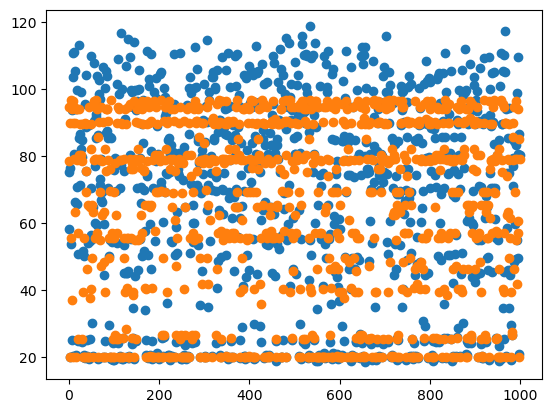

In [8]:
cantidad_probar = 1000
X_axis = np.arange(cantidad_probar)

fig, ax = plt.subplots()
ax.scatter(X_axis, y_test.iloc[0:cantidad_probar].values)
ax.scatter(X_axis, y_pred[0:cantidad_probar])
plt.show()

In [9]:
r2_score(y_test, y_pred)

0.884254304877448